### Análise de Teste A/B para Otimização de Engajamento no Site


---

#### **Contexto:**
O projeto visa analisar o impacto de uma mudança no design do site de varejo online, especificamente a alteração da cor de fundo da página principal de **branco** (Grupo A) para **preto** (Grupo B). O objetivo é entender se essa alteração influencia o comportamento dos usuários em termos de engajamento e conversão. A empresa busca utilizar os resultados para tomar decisões baseadas em dados sobre o design do site e melhorar a experiência do usuário.

O conjunto de dados foi gerado de forma sintética para simular interações reais de usuários no site, com informações como visualizações de página, tempo gasto no site, conversões, tipo de dispositivo e localização geográfica.

##### **Objetivo Principal:**
Avaliar se a mudança na cor de fundo do site resulta em um impacto significativo no comportamento dos usuários.

#### **Público-Alvo**
- **Equipe de Produto:** Para entender o impacto da mudança no design do site.
- **Equipe de Marketing:** Para otimizar estratégias baseadas em resultados segmentados.
- **Stakeholders Executivos:** Para decisões estratégicas de implementação.



# Bibliotecas Utilizadas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Análise e Tratamento dos dados

In [7]:
df = pd.read_csv('ab_testing.csv', na_values='na')

display(df)

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [9]:
# Valores Ausentes por coluna
df.isnull().sum()


User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64

In [10]:
# Valores Duplicatos
df.duplicated().sum()

0

# Análise Exploratória

In [12]:
# Análise Estatística numérica
df.describe()

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


### **Analisando as Colunas**

#### **User ID**
| Métrica   | Valor             | Interpretação                                                                 |
|-----------|-------------------|-------------------------------------------------------------------------------|
| `count`   | 5000              | Há 5.000 IDs de usuários únicos.                                             |
| `mean`    | 14925.159         | A média dos IDs está em torno de 14.925.159 (não é relevante para análise).  |
| `std`     | 2869.154          | IDs têm uma dispersão relativamente alta, mas IDs em si não são analisáveis. |
| `min`     | 10001             | O menor ID é 10.001.                                                        |
| `25%`     | 12456.250         | 25% dos IDs são menores que 12.456.250.                                      |
| `50%`     | 14858.500         | A mediana dos IDs é 14.858.500.                                              |
| `75%`     | 17379.750         | 75% dos IDs são menores que 17.379.750.                                      |
| `max`     | 19995             | O maior ID é 19.995.                                                        |

**Interpretação:**  
O `User ID` é apenas um identificador único e não influencia diretamente na análise, mas é útil para rastrear usuários individuais.

---

#### **Page Views**
| Métrica   | Valor             | Interpretação                                                                 |
|-----------|-------------------|-------------------------------------------------------------------------------|
| `count`   | 5000              | Todas as 5.000 entradas têm valores para visualizações de página.            |
| `mean`    | 7.538             | Em média, cada usuário visualizou cerca de 7,5 páginas durante a sessão.     |
| `std`     | 4.022             | A dispersão em relação à média é de cerca de 4 páginas.                      |
| `min`     | 1                 | O menor número de páginas visualizadas foi 1.                                |
| `25%`     | 4                 | 25% dos usuários visualizaram até 4 páginas.                                 |
| `50%`     | 8                 | A mediana é 8 páginas (50% dos usuários visualizaram até 8 páginas).         |
| `75%`     | 11                | 75% dos usuários visualizaram até 11 páginas.                                |
| `max`     | 14                | O maior número de páginas visualizadas foi 14.                              |

**Interpretação:**  
A maioria dos usuários visualizou entre 4 e 11 páginas (intervalo interquartil), com uma média de cerca de 7,5 páginas. O número máximo de páginas visualizadas é 14, o que sugere que o site não teve sessões muito longas.

---

#### **Time Spent**
| Métrica   | Valor             | Interpretação                                                                 |
|-----------|-------------------|-------------------------------------------------------------------------------|
| `count`   | 5000              | Todas as 5.000 entradas têm valores para tempo gasto no site.                |
| `mean`    | 242.513           | Em média, os usuários passaram cerca de 242,5 segundos (aproximadamente 4 minutos).|
| `std`     | 118.254           | A dispersão em relação à média é alta, com um desvio padrão de 118,3 segundos.|
| `min`     | 40                | O menor tempo registrado foi de 40 segundos.                                 |
| `25%`     | 137               | 25% dos usuários passaram até 137 segundos no site (pouco mais de 2 minutos).|
| `50%`     | 243               | A mediana é 243 segundos (cerca de 4 minutos).                               |
| `75%`     | 346               | 75% dos usuários passaram até 346 segundos (quase 6 minutos).                |
| `max`     | 449               | O maior tempo registrado foi de 449 segundos (cerca de 7,5 minutos).         |

**Interpretação:**  
O tempo gasto no site varia amplamente. A maioria dos usuários passou entre 137 e 346 segundos no site, com alguns usuários chegando a 449 segundos. O tempo médio (242 segundos) sugere um engajamento moderado.


In [14]:
# Análise Estatística Categórica
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Group,5000,2,A,2519
Conversion,5000,2,No,4515
Device,5000,2,Desktop,2538
Location,5000,4,Scotland,1281


### **Interpretação por Coluna**

#### **Group**
| Métrica   | Valor  | Interpretação                                                   |
|-----------|--------|-----------------------------------------------------------------|
| `count`   | 5000   | Todos os 5.000 usuários estão divididos entre os grupos `A` e `B`.|
| `unique`  | 2      | Existem dois grupos no teste A/B: `A` (controle) e `B` (tratamento).|
| `top`     | A      | O grupo `A` (controle) é o mais frequente.                      |
| `freq`    | 2519   | O grupo `A` contém 2.519 usuários, ligeiramente mais que o grupo `B`.|

**Conclusão:**  
Os grupos estão quase balanceados, o que é ideal para um Teste A/B. Um grupo ligeiramente maior não deve afetar a análise, mas convém verificar os resultados com normalização.

---

#### **Conversion**
| Métrica   | Valor  | Interpretação                                                   |
|-----------|--------|-----------------------------------------------------------------|
| `count`   | 5000   | Todos os 5.000 usuários têm um valor registrado para conversão. |
| `unique`  | 2      | Existem dois possíveis valores para conversão: `Yes` e `No`.    |
| `top`     | No     | A maioria dos usuários não converteu (não realizou a ação desejada). |
| `freq`    | 4515   | Dos 5.000 usuários, 4.515 (90,3%) não converteram.              |

**Conclusão:**  
A taxa de conversão geral parece baixa (~9,7%). Isso é comum em muitos sites e sugere que o objetivo do teste A/B é melhorar essa métrica.

---

#### **Device**
| Métrica   | Valor  | Interpretação                                                   |
|-----------|--------|-----------------------------------------------------------------|
| `count`   | 5000   | Todos os 5.000 usuários têm o tipo de dispositivo registrado.   |
| `unique`  | 2      | Existem dois tipos de dispositivos: `Desktop` e `Mobile`.       |
| `top`     | Desktop| A maioria dos usuários acessa o site por um dispositivo desktop.|
| `freq`    | 2538   | 2.538 usuários (50,8%) acessaram via desktop.                   |

**Conclusão:**  
O site parece ter um equilíbrio entre usuários de **desktop** e **mobile**. Isso permite uma análise segmentada para verificar se o dispositivo influencia os resultados do teste A/B.

---

#### **Location**
| Métrica   | Valor      | Interpretação                                               |
|-----------|------------|-------------------------------------------------------------|
| `count`   | 5000       | Todos os usuários têm uma localização registrada.           |
| `unique`  | 4          | Existem quatro regiões distintas: `Scotland`, `England`, `Wales`, e `Northern Ireland`.|
| `top`     | Scotland   | A maior parte dos usuários está baseada na Escócia.         |
| `freq`    | 1281       | 1.281 usuários (25,6%) são da Escócia.                      |


# Visualições de dados

### Distribuição dos Dados

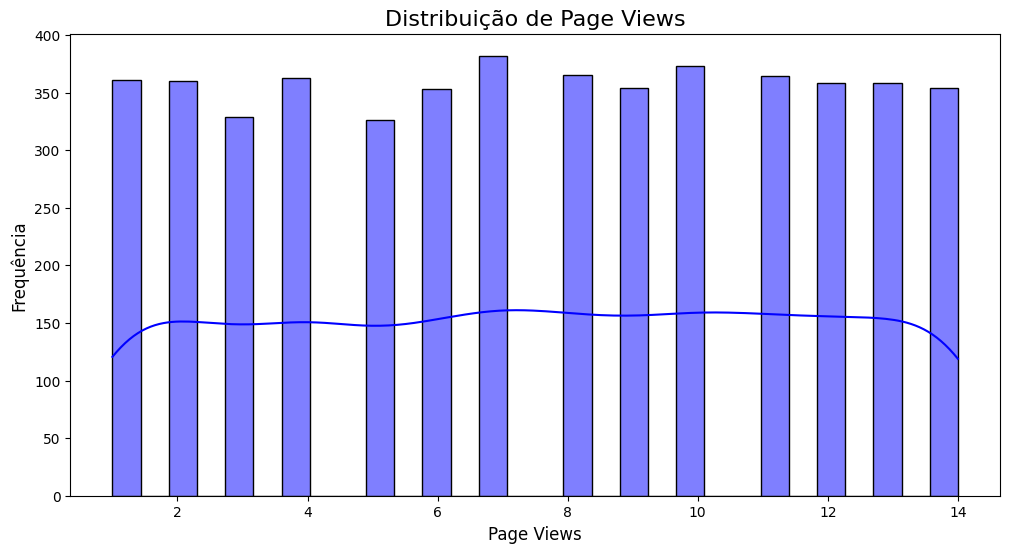

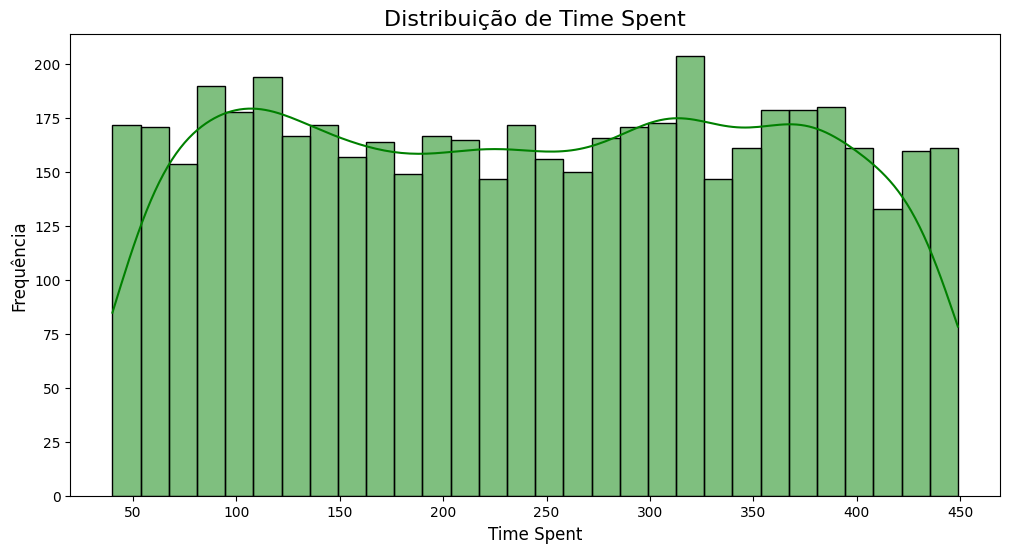

In [26]:
# Histogramas para Page Views
plt.figure(figsize=(12, 6))
sns.histplot(df['Page Views'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Page Views', fontsize=16)
plt.xlabel('Page Views', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

# Histogramas para Time Spent
plt.figure(figsize=(12, 6))
sns.histplot(df['Time Spent'], bins=30, kde=True, color='green')
plt.title('Distribuição de Time Spent', fontsize=16)
plt.xlabel('Time Spent', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()




## Comparação por grupos

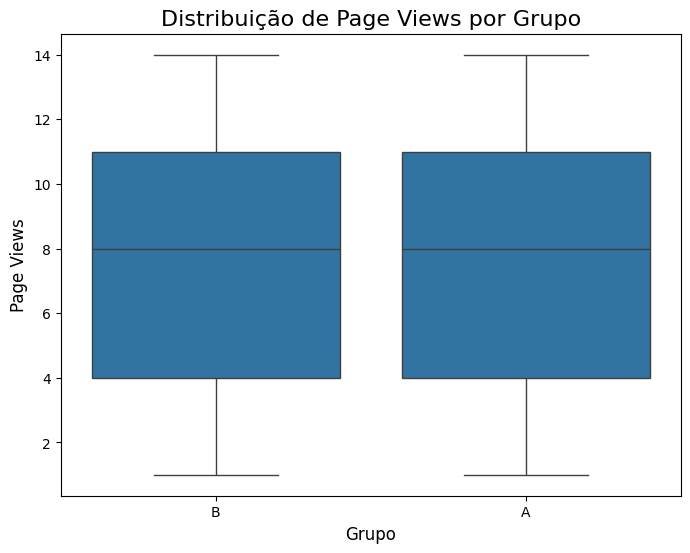

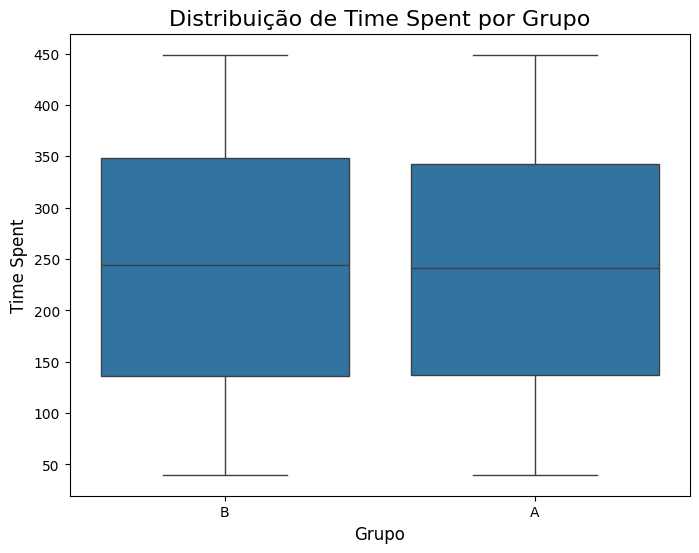

In [28]:
# Boxplot para Page Views por Grupo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Page Views', data=df)
plt.title('Distribuição de Page Views por Grupo', fontsize=16)
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('Page Views', fontsize=12)
plt.show()

# Boxplot para Time Spent por Grupo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Time Spent', data=df)
plt.title('Distribuição de Time Spent por Grupo', fontsize=16)
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('Time Spent', fontsize=12)
plt.show()


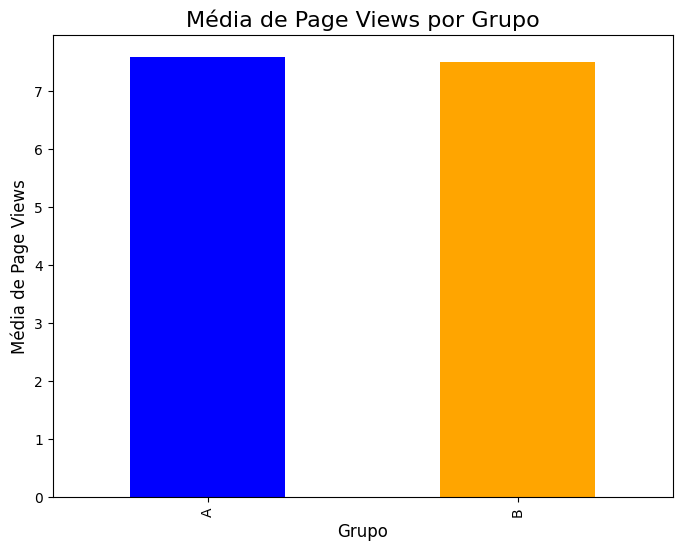

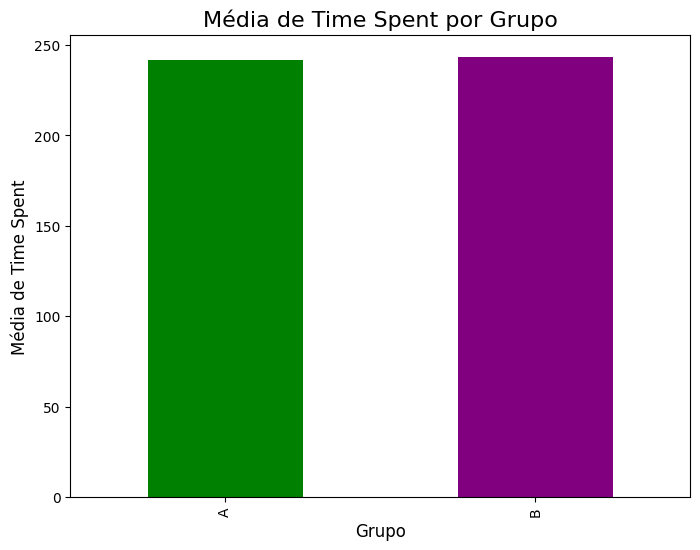

In [29]:
# Médias de Page Views por Grupo
page_views_mean = df.groupby('Group')['Page Views'].mean()
page_views_mean.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Média de Page Views por Grupo', fontsize=16)
plt.ylabel('Média de Page Views', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.show()

# Médias de Time Spent por Grupo
time_spent_mean = df.groupby('Group')['Time Spent'].mean()
time_spent_mean.plot(kind='bar', color=['green', 'purple'], figsize=(8, 6))
plt.title('Média de Time Spent por Grupo', fontsize=16)
plt.ylabel('Média de Time Spent', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.show()



Taxa de Conversão (Grupo A): 5.40%
Taxa de Conversão (Grupo B): 14.07%


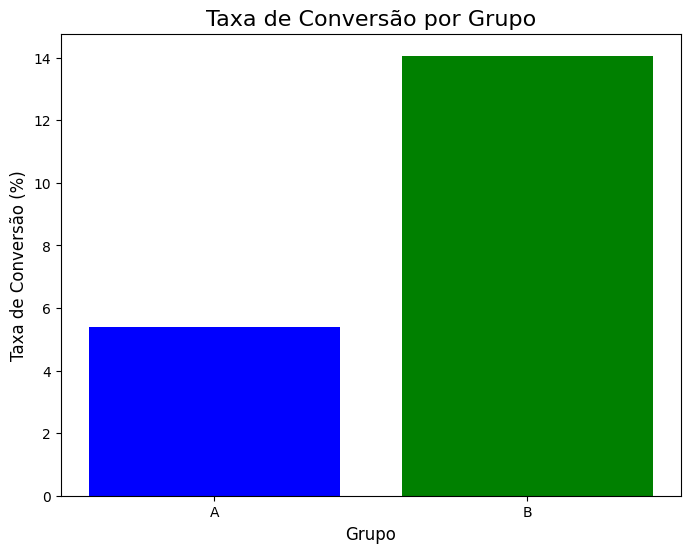

In [30]:
# Filtrando os grupos
grupo_a = df[df['Group'] == 'A']
grupo_b = df[df['Group'] == 'B']

#Calculando a taxa de conversao
taxa_conversao_a = grupo_a['Conversion'].value_counts(normalize=True)['Yes'] * 100
taxa_conversao_b = grupo_b['Conversion'].value_counts(normalize=True)['Yes'] * 100

# exibindo
print(f"\nTaxa de Conversão (Grupo A): {taxa_conversao_a:.2f}%")
print(f"Taxa de Conversão (Grupo B): {taxa_conversao_b:.2f}%")

# Visualização Gráfica
grupos = ['A', 'B']
taxas = [taxa_conversao_a, taxa_conversao_b]

plt.figure(figsize=(8, 6))
plt.bar(grupos, taxas, color=['blue', 'green']) 
plt.title("Taxa de Conversão por Grupo", fontsize=16)
plt.xlabel("Grupo", fontsize=12)
plt.ylabel("Taxa de Conversão (%)", fontsize=12)
plt.show()

## Conclusões:

Com base nos gráficos apresentados, é possível realizar uma análise abrangente das métricas estudadas e interpretar o impacto da mudança de design no comportamento dos usuários. Vamos abordar cada métrica de forma integrada.

A **distribuição de Page Views**, representada no primeiro gráfico, mostra que o número de visualizações de página pelos usuários tem uma frequência bastante uniforme. Não foram identificados picos significativos ou concentrações específicas em determinados intervalos, e a linha de densidade reforça essa uniformidade. Essa constatação sugere que a métrica Page Views não sofreu alterações ou padrões que diferenciem os dois grupos testados. Em relação à análise por grupo, os boxplots deixam evidente que tanto o grupo A quanto o grupo B têm distribuições praticamente idênticas para Page Views. As medianas são iguais, assim como os intervalos interquartis, e não foram encontrados outliers significativos. Portanto, é razoável concluir que a mudança no design do site não teve impacto direto no comportamento de visualização de páginas pelos usuários.

Na análise de **Time Spent**, a métrica segue uma tendência similar à de Page Views. Através do boxplot, observamos que o tempo gasto no site pelos usuários também apresenta distribuições idênticas entre os dois grupos. As medianas coincidem, e os intervalos interquartis possuem praticamente o mesmo tamanho. Além disso, não há evidências de valores discrepantes que pudessem influenciar a análise. Essa uniformidade indica que o novo design do site não alterou significativamente o tempo médio que os usuários passam navegando no site. O comportamento observado reforça a hipótese de que Page Views e Time Spent não são métricas afetadas diretamente pela mudança visual.

Por outro lado, ao analisar a **taxa de conversão**, percebemos um cenário completamente diferente. O gráfico de barras mostra uma diferença marcante entre os grupos: o grupo B, que recebeu o novo design, apresentou uma taxa de conversão consideravelmente maior que o grupo A. Essa diferença visual é clara e significativa, destacando que o novo design do site parece ter gerado um impacto positivo no comportamento dos usuários, incentivando mais conversões no grupo B. Essa evidência sugere que, mesmo que o novo design não tenha influenciado métricas como o tempo gasto no site ou as visualizações de página, ele foi eficaz em melhorar a taxa de conversão, que é uma métrica crítica para medir o sucesso de ações voltadas ao aumento de engajamento e decisão do usuário.

Por fim, os gráficos que comparam as médias de Page Views e Time Spent reforçam os achados anteriores. As médias entre os grupos A e B são praticamente iguais para essas duas métricas, indicando que a mudança de design não gerou impacto relevante nesses comportamentos. Já no caso da taxa de conversão, a diferença é inegável, e ela surge como a métrica mais importante a ser destacada nessa análise.

Concluindo, a mudança de design no site teve um impacto limitado nas métricas de Page Views e Time Spent, mas foi claramente eficiente em aumentar a taxa de conversão para o grupo B. Essa evidência aponta para uma decisão estratégica interessante: a adoção do novo design pode ser recomendada, considerando seu impacto direto no aumento de conversões, mesmo que outras métricas de engajamento permaneçam estáveis. Essa conclusão deve ser validada com testes estatísticos adicionais para confirmar a significância das diferenças observadas, especialmente na taxa de conversão.


### Teste t para Page Views e Time Spent para confirmar se as diferenças nas médias dessas métricas entre os grupos são estatisticamente insignificantes.

In [34]:
# Teste t para Page Views
t_stat_page, p_value_page = ttest_ind(grupo_a['Page Views'], grupo_b['Page Views'])
print(f"Teste t para Page Views: t-stat = {t_stat_page:.2f}, p-value = {p_value_page:.5f}")

# Teste t para Time Spent
t_stat_time, p_value_time = ttest_ind(grupo_a['Time Spent'], grupo_b['Time Spent'])
print(f"Teste t para Time Spent: t-stat = {t_stat_time:.2f}, p-value = {p_value_time:.5f}")


Teste t para Page Views: t-stat = 0.78, p-value = 0.43602
Teste t para Time Spent: t-stat = -0.47, p-value = 0.63870


### Teste Qui-Quadrado para Taxa de Conversão para verificar a significância da diferença na taxa de conversão entre os grupos.

In [37]:
# Tabela de Contingência
contingencia = pd.crosstab(df['Group'], df['Conversion'])

# Teste qui-quadrado
chi2, p_value_chi2, dof, expected = chi2_contingency(contingencia)
print(f"Teste Qui-Quadrado: chi2 = {chi2:.2f}, p-value = {p_value_chi2:.5f}")


Teste Qui-Quadrado: chi2 = 106.23, p-value = 0.00000


# Insights:
A mudança no fundo para preto **não trouxe impacto estatisticamente significativo** no engajamento dos usuários, conforme indicado pelos testes t realizados para as métricas de **visualizações de páginas (Page Views)** e **tempo gasto no site (Time Spent)**. Esses resultados sugerem que a cor de fundo, isoladamente, não é um fator determinante para influenciar o comportamento de navegação dos usuários.

Por outro lado, o teste qui-quadrado mostrou que a mudança no fundo para preto teve um impacto estatisticamente significativo na **taxa de conversão**, indicando que a nova configuração incentivou mais usuários a realizarem ações desejadas no site. Esse resultado reforça a importância de usar o Teste A/B para tomar decisões informadas e baseadas em dados. Assim, a implementação do fundo preto como padrão no site é altamente recomendada, dado seu impacto positivo na conversão.
### **Recomendação**
A mudança de design implementada no grupo B (novo design) apresentou um impacto significativo na taxa de conversão, que é uma métrica diretamente ligada ao sucesso do negócio. Embora as métricas de engajamento, como **Page Views** e **Time Spent**, não tenham sido afetadas, a melhoria na conversão sugere que o novo design facilita ou incentiva os usuários a tomar a ação desejada, como concluir uma compra ou se inscrever em um serviço. **Portanto, recomendo a adoção do novo design de forma ampla, considerando seu impacto positivo em conversões.**

# Dashboard

In [54]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

# Carregando os dados (substitua 'ab_testing.csv' pelo caminho correto do arquivo)
df = pd.read_csv('ab_testing.csv')

# Calculando as médias e taxas de conversão
page_views_mean = df.groupby('Group')['Page Views'].mean().reset_index()
time_spent_mean = df.groupby('Group')['Time Spent'].mean().reset_index()
conversion_rate = df.groupby('Group')['Conversion'].value_counts(normalize=True).unstack()['Yes'] * 100
conversion_rate_df = conversion_rate.reset_index().rename(columns={'Yes': 'Conversion Rate (%)'})

# Inicializando o app
app = dash.Dash(__name__)

# Layout do dashboard
app.layout = html.Div([
    html.H1("Resultados do Teste A/B", style={'textAlign': 'center'}),

    # Gráfico de Média de Page Views
    html.Div([
        html.H3("Média de Visualizações de Página por Grupo"),
        dcc.Graph(
            id='page-views-chart',
            figure=px.bar(
                page_views_mean,
                x='Group',
                y='Page Views',
                title='Média de Visualizações de Página por Grupo',
                labels={'Page Views': 'Média de Page Views'},
                color='Group'
            )
        )
    ]),

    # Gráfico de Média de Time Spent
    html.Div([
        html.H3("Média de Tempo Gasto por Grupo"),
        dcc.Graph(
            id='time-spent-chart',
            figure=px.bar(
                time_spent_mean,
                x='Group',
                y='Time Spent',
                title='Média de Tempo Gasto por Grupo',
                labels={'Time Spent': 'Média de Tempo Gasto (segundos)'},
                color='Group'
            )
        )
    ]),

    # Gráfico de Taxa de Conversão
    html.Div([
        html.H3("Taxa de Conversão por Grupo"),
        dcc.Graph(
            id='conversion-rate-chart',
            figure=px.bar(
                conversion_rate_df,
                x='Group',
                y='Conversion Rate (%)',
                title='Taxa de Conversão por Grupo',
                labels={'Conversion Rate (%)': 'Taxa de Conversão (%)'},
                color='Group'
            )
        )
    ]),

    # Resumo Estatístico
    html.Div([
        html.H3("Resumo Estatístico", style={'textAlign': 'center'}),
        html.Table([
            html.Tr([html.Th("Métrica"), html.Th("Grupo A"), html.Th("Grupo B")]),
            html.Tr([html.Td("Média de Page Views"), html.Td(page_views_mean['Page Views'].iloc[0]), html.Td(page_views_mean['Page Views'].iloc[1])]),
            html.Tr([html.Td("Média de Time Spent"), html.Td(time_spent_mean['Time Spent'].iloc[0]), html.Td(time_spent_mean['Time Spent'].iloc[1])]),
            html.Tr([html.Td("Taxa de Conversão (%)"), html.Td(f"{conversion_rate.iloc[0]:.2f}%"), html.Td(f"{conversion_rate.iloc[1]:.2f}%")]),
        ], style={'margin': 'auto', 'width': '50%', 'textAlign': 'center', 'border': '1px solid black'})
    ])
])

# Rodando o app
if __name__ == '__main__':
    app.run_server(debug=True)
